## This Notebook Introduces How to apply 'Transfer Learning' in Kaggle

Thank you for opening this Notebook!

Press "Fork" at the top-right of this screen to run this notebook yourself and build each of the examples.

I have made all efforts to document each and every step involved so that this notebook acts as a good starting point for new Kagglers who hope to apply **Transfer Learning** to their problem.

## Libraries and settings ##

In [2]:
import os, cv2, random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm    #Helps in vis
from random import shuffle 

%matplotlib inline 

TRAIN_DIR = './input/train/'
TEST_DIR = './input/test/'
IMG_SIZE = 224

SHORT_LIST_TRAIN = os.listdir(TRAIN_DIR)[0:5000] #using a subset of data as resouces as limited. 
SHORT_LIST_TEST = os.listdir(TEST_DIR)

In [3]:
def label_img(img):
    word_label = img.split('.')[-3]
    # conversion to one-hot array [cat,dog]
    #                            [much cat, no dog]
    if word_label == 'cat': return [1,0]
    #                             [no cat, very doggo]
    elif word_label == 'dog': return [0,1]

In [4]:
def create_train_data():
    training_data = []
    for img in tqdm(SHORT_LIST_TRAIN):
        label = label_img(img)
        path = os.path.join(TRAIN_DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        training_data.append([np.array(img),np.array(label)])
    shuffle(training_data)
    return training_data

def process_test_data():
    testing_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        path = os.path.join(TEST_DIR,img)
        img_num = img.split('.')[0]
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        testing_data.append([np.array(img), img_num])
    shuffle(testing_data)
    return testing_data

## Visualizing Classes ##

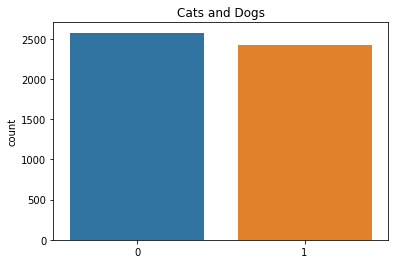

In [5]:
labels = []
for i in SHORT_LIST_TRAIN:
    if 'dog' in i:
        labels.append(1)
    else:
        labels.append(0)

sns.countplot(labels)
plt.title('Cats and Dogs')

## Creating a Training Set Data##

In [6]:
train = create_train_data()

100%|██████████| 5000/5000 [00:10<00:00, 478.33it/s]


## From Train Dividing X and Y##

In [7]:
X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,3)
Y = np.array([i[1] for i in train])

## Specify Model##

In [11]:
from keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import Dense, Flatten, GlobalAveragePooling2D

NUM_CLASSES = 2
RESNET_WEIGHTS_PATH = './resnet50/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
my_new_model = Sequential()
my_new_model.add(ResNet50(include_top=False, pooling='max', weights='imagenet'))
my_new_model.add(Dense(NUM_CLASSES, activation='softmax'))

# Say not to train first layer (ResNet) model. It is already trained
my_new_model.layers[0].trainable = True

## Compile Model##

In [12]:
my_new_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

## Model Sumary##

In [13]:
my_new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 4098      
Total params: 23,591,810.0
Trainable params: 23,538,690.0
Non-trainable params: 53,120.0
_________________________________________________________________


## Fit Model##

In [14]:
history = my_new_model.fit(X, Y, validation_split=0.20, epochs=4, batch_size=64)

Train on 4000 samples, validate on 1000 samples
Epoch 1/4
4000/4000 [==============================] - 46s - loss: 0.1555 - acc: 0.9350 - val_loss: 0.0463 - val_acc: 0.9840
Epoch 2/4
4000/4000 [==============================] - 43s - loss: 0.0352 - acc: 0.9918 - val_loss: 0.0316 - val_acc: 0.9870
Epoch 3/4
4000/4000 [==============================] - 43s - loss: 0.0151 - acc: 0.9993 - val_loss: 0.0349 - val_acc: 0.9880
Epoch 4/4
4000/4000 [==============================] - 44s - loss: 0.0115 - acc: 0.9985 - val_loss: 0.0335 - val_acc: 0.9870


## Plotting loss and accuracy for the model##

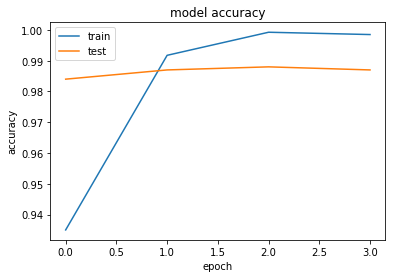

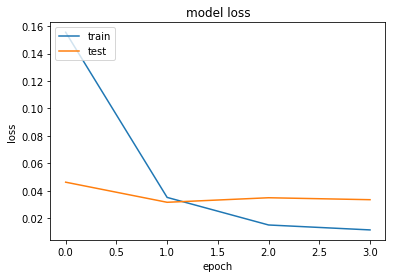

In [15]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
import gc 
del X
del Y
del train
gc.collect()

11466

100%|██████████| 5000/5000 [00:10<00:00, 497.26it/s]


Train on 2500 samples, validate on 2500 samples
Epoch 1/3
2500/2500 [==============================] - 43s - loss: 0.0487 - acc: 0.9832 - val_loss: 0.0561 - val_acc: 0.9784
Epoch 2/3
2500/2500 [==============================] - 44s - loss: 0.0256 - acc: 0.9908 - val_loss: 0.0276 - val_acc: 0.9900
Epoch 3/3
2500/2500 [==============================] - 44s - loss: 0.0177 - acc: 0.9944 - val_loss: 0.0523 - val_acc: 0.9816


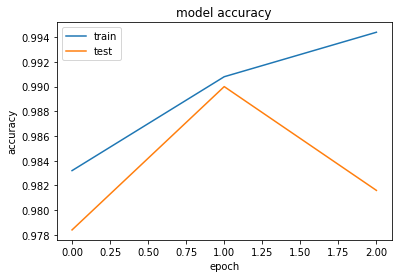

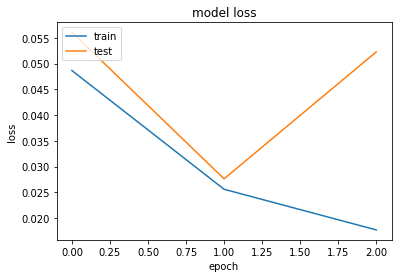

In [19]:

SHORT_LIST_TRAIN = os.listdir(TRAIN_DIR)[-5000:]
train = create_train_data()
X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,3)
Y = np.array([i[1] for i in train])
history = my_new_model.fit(X, Y, validation_split=0.5, epochs=3, batch_size=16)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Testing Model on the Test Data##

100%|██████████| 12500/12500 [00:25<00:00, 496.03it/s]


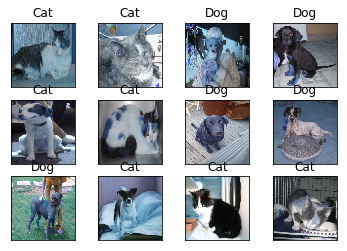

In [20]:
import matplotlib.pyplot as plt

# if you need to create the data:
test_data = process_test_data()
# if you already have some saved:
#test_data = np.load('test_data.npy')

fig=plt.figure()

for num,data in enumerate(test_data[:12]):
    # cat: [1,0]
    # dog: [0,1]
    
    img_num = data[1]
    img_data = data[0]
    
    y = fig.add_subplot(3,4,num+1)
    orig = img_data
    data = img_data.reshape(-1,IMG_SIZE,IMG_SIZE,3)
    #model_out = model.predict([data])[0]
    model_out = my_new_model.predict([data])[0]
    
    if np.argmax(model_out) == 1: str_label='Dog'
    else: str_label='Cat'
        
    y.imshow(orig)
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()

In [21]:
prob = []
img_list = []
for data in tqdm(test_data):
    img_num = data[1]
    img_data = data[0]
    orig = img_data
    data = img_data.reshape(-1,IMG_SIZE,IMG_SIZE,3)
    model_out = my_new_model.predict([data])[0]
    img_list.append(img_num)
    prob.append(model_out[1])

100%|██████████| 12500/12500 [05:38<00:00, 36.88it/s]


In [23]:
submission = pd.DataFrame({'id':img_list , 'label':prob})
submission.head()
submission.to_csv("submit.csv", index=False)

Please upvote this kernel so that it reaches the top of the chart and is easily locatable by new users. Your comments on how we can improve this kernel is welcome. Thanks.